**Домашнее задание по Модулю 3**   
*"Анализ данных и визуализация"*  

---

Домашняя работа №1

---

*Выполнила: Капитаненко Ирина*

# Задание основное
Создан dataset с данными банковских клиентов и их кредитной истории.   
На каждую дату был проведен анализ определенного кредитного клиента, представлены данные о его категориях, кредитном рейтинге, количестве кредитов и количестве просрочек по этим кредитам.

## Гипотезы
Банк использует данные для сегментации и категоризации клиентов с целью принятия взвешенных бизнес-решений.

Гипотеза 1: Кредитный рейтинг не зависит от
возрастной группы  
Гипотеза 2: Возраст не влияет на просрочки   
Гипотеза 3: Уровень дохода не влияет на просрочки  
Гипотеза 4: Город проживания не влияет на кредитный рейтинг  
Гипотеза 5: Источник дохода не влияет на кредитный рейтинг  
Гипотеза 6: Пенсионеры не имеют меньше просрочек, чем работающие клиенты

## Визуализации

 Гипотеза 1: Кредитный рейтинг не зависит от возрастной группы

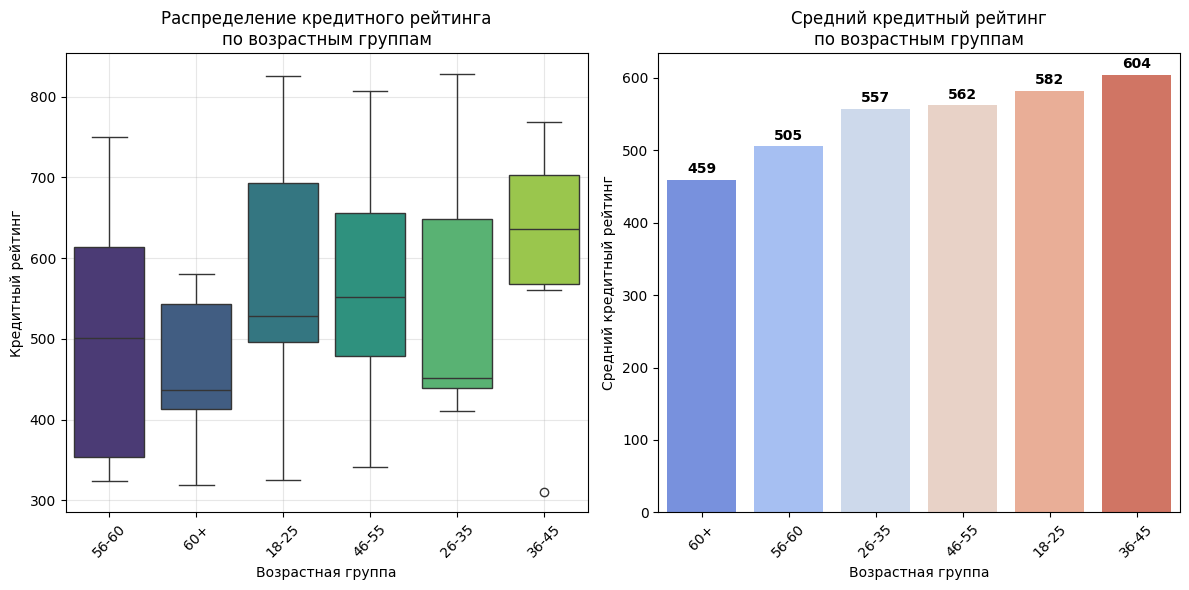

In [ ]:
# Гипотеза 1: Кредитный рейтинг не зависит от возрастной группы
plt.figure(figsize=(12, 6))

# График 1: Boxplot для распределения кредитного рейтинга по возрастным группам
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Возраст_группа', y='Кредитный_рейтинг', hue='Возраст_группа', palette='viridis', legend=False)
plt.title('Распределение кредитного рейтинга\nпо возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Кредитный рейтинг')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# График 2: Столбчатая диаграмма средних значений
plt.subplot(1, 2, 2)
средний_рейтинг_по_возрасту = df.groupby('Возраст_группа')['Кредитный_рейтинг'].mean().sort_values()
sns.barplot(x=средний_рейтинг_по_возрасту.index, y=средний_рейтинг_по_возрасту.values,
            hue=средний_рейтинг_по_возрасту.index, palette='coolwarm', legend=False)
plt.title('Средний кредитный рейтинг\nпо возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Средний кредитный рейтинг')
plt.xticks(rotation=45)

# Добавление значений на столбцы
for i, v in enumerate(средний_рейтинг_по_возрасту.values):
    plt.text(i, v + 5, f'{v:.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

Гипотеза ОПРОВЕРГНУТА: Кредитный рейтинг ЗАВИСИТ от возрастной группы"

Гипотеза 2: Возраст не влияет на просрочки

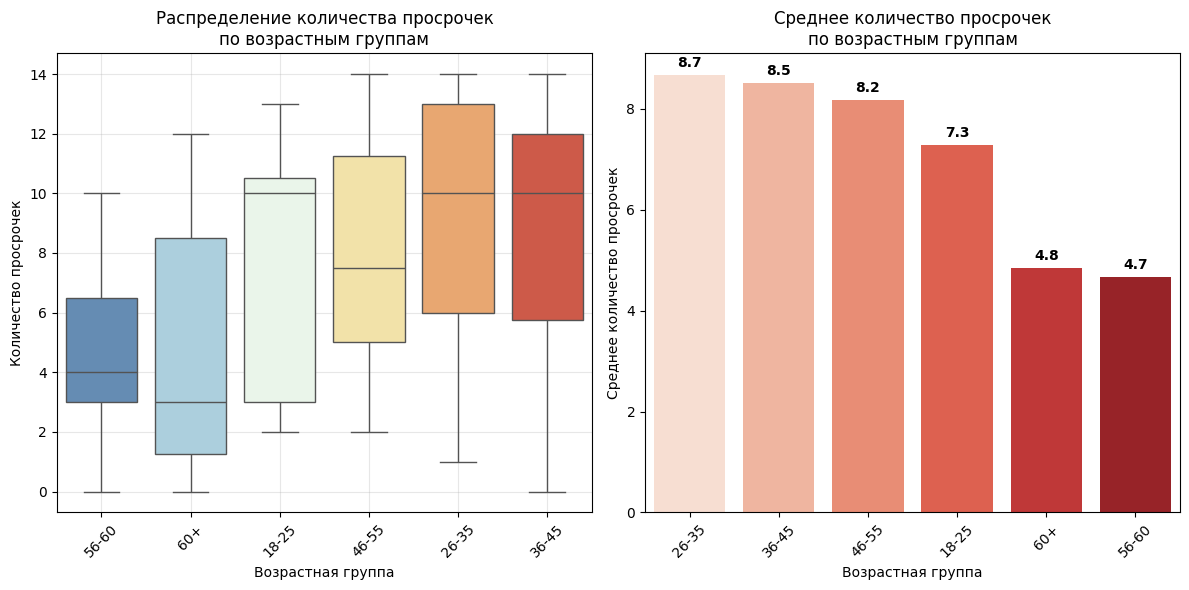

In [ ]:
# Гипотеза 2: Возраст не влияет на просрочки
plt.figure(figsize=(12, 6))

# График 1: Boxplot для распределения просрочек по возрастным группам
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Возраст_группа', y='Просрочки', hue='Возраст_группа', palette='RdYlBu_r', legend=False)
plt.title('Распределение количества просрочек\nпо возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество просрочек')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# График 2: Столбчатая диаграмма средних значений просрочек
plt.subplot(1, 2, 2)
средние_просрочки_по_возрасту = df.groupby('Возраст_группа')['Просрочки'].mean().sort_values(ascending=False)
sns.barplot(x=средние_просрочки_по_возрасту.index, y=средние_просрочки_по_возрасту.values,
            hue=средние_просрочки_по_возрасту.index, palette='Reds', legend=False)
plt.title('Среднее количество просрочек\nпо возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Среднее количество просрочек')
plt.xticks(rotation=45)

# Добавление значений на столбцы
for i, v in enumerate(средние_просрочки_по_возрасту.values):
    plt.text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

Гипотеза ОПРОВЕРГНУТА: Возраст ВЛИЯЕТ на количество просрочек

Гипотеза 3: Уровень дохода не влияет на просрочки

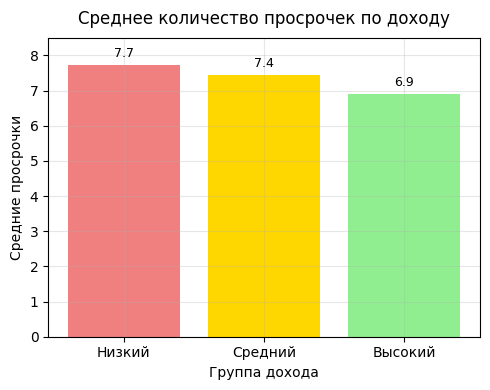

In [ ]:
# Гипотеза 3: Уровень дохода не влияет на просрочки

# Сначала создаем группы доходов
df['Группа_дохода'] = pd.cut(df['Доход'],
                            bins=[20000, 60000, 120000, 200000],
                            labels=['Низкий', 'Средний', 'Высокий'])

# Компактный размер
plt.figure(figsize=(5, 4))

средние_просрочки_по_доходу = df.groupby('Группа_дохода', observed=True)['Просрочки'].mean()

plt.bar(средние_просрочки_по_доходу.index, средние_просрочки_по_доходу.values,
        color=['lightcoral', 'gold', 'lightgreen'])
plt.title('Среднее количество просрочек по доходу', fontsize=12, pad=10)
plt.xlabel('Группа дохода', fontsize=10)
plt.ylabel('Средние просрочки', fontsize=10)

# Автоматически настраиваем отступ и границы
max_value = средние_просрочки_по_доходу.max()
plt.ylim(0, max_value * 1.1)  # +10% сверху

for i, v in enumerate(средние_просрочки_по_доходу.values):
    plt.text(i, v + max_value * 0.02, f'{v:.1f}', ha='center', va='bottom', fontsize=9)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Гипотеза ОПРОВЕРГНУТА: уровень дохода влияет на просрочки

Гипотеза 4: Город проживания не влияет на кредитный рейтинг

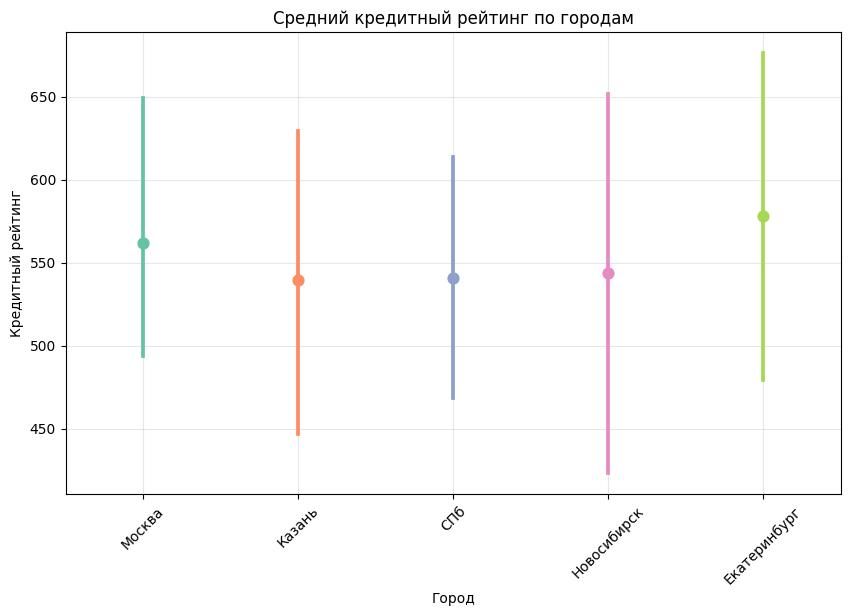

In [ ]:
# Гипотеза 4: Город проживания не влияет на кредитный рейтинг

plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='Город', y='Кредитный_рейтинг', hue='Город', palette='Set2', legend=False)
plt.title('Средний кредитный рейтинг по городам')
plt.xlabel('Город')
plt.ylabel('Кредитный рейтинг')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()


Гипотеза ОПРОВЕРГНУТА: город проживания влияет на кредитный рейтинг

Гипотеза 5: Источник дохода не влияет на кредитный рейтинг

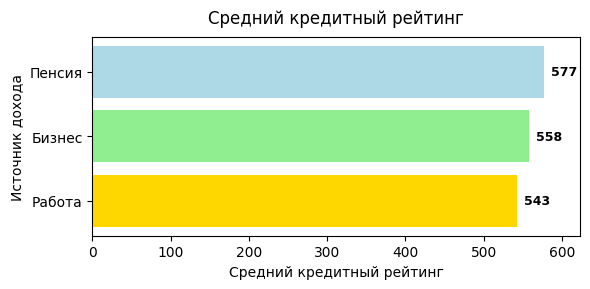

In [ ]:
# Гипотеза 5: Источник дохода не влияет на кредитный рейтинг
plt.figure(figsize=(6, 3))

средний_рейтинг = df.groupby('Источник_дохода')['Кредитный_рейтинг'].mean().sort_values()

plt.barh(средний_рейтинг.index, средний_рейтинг.values, color=['gold', 'lightgreen', 'lightblue'])
plt.title('Средний кредитный рейтинг', fontsize=12, pad=10)
plt.xlabel('Средний кредитный рейтинг', fontsize=10)
plt.ylabel('Источник дохода', fontsize=10)

# Автоматически настраиваем отступ и границы
max_value = средний_рейтинг.max()
plt.xlim(0, max_value * 1.08)

# Добавляем цифры на столбцы с автоматическим отступом
for i, v in enumerate(средний_рейтинг.values):
    plt.text(v + max_value * 0.015, i, f'{v:.0f}', ha='left', va='center',
             fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

Гипотеза ОПРОВЕРГНУТА: исочник дохода влияет на кредитный рейтинг

Гипотеза 6: Пенсионеры не имеют меньше просрочек, чем работающие клиенты

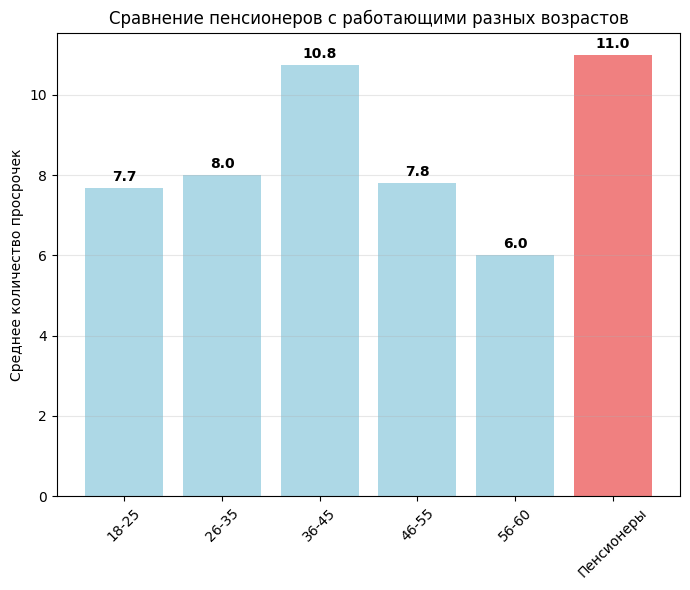

In [ ]:
# Гипотеза 6: Пенсионеры не имеют меньше просрочек, чем работающие клиенты

plt.figure(figsize=(7, 6))

# Сравниваем пенсионеров с работающими разных возрастов
работающие_по_возрасту = df[df['Источник_дохода'] == 'Работа'].groupby('Возраст_группа')['Просрочки'].mean()
пенсионеры_mean = пенсионеры['Просрочки'].mean()

# Создаем данные для графика
все_группы = list(работающие_по_возрасту.index) + ['Пенсионеры']
значения = list(работающие_по_возрасту.values) + [пенсионеры_mean]

colors = ['lightblue'] * len(работающие_по_возрасту) + ['lightcoral']

plt.bar(все_группы, значения, color=colors)
plt.title('Сравнение пенсионеров с работающими разных возрастов')
plt.ylabel('Среднее количество просрочек')

# Добавляем значения на столбцы
for i, v in enumerate(значения):
    plt.text(i, v + 0.1, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Гипотеза ПОДТВЕРЖДЕНА: пенсионеры не имеют меньше просрочек, чем работающие клиенты

# Дополнительное задание
Cгенерирован dataset в формате .csv о продажах интернет-магазина одежды по регионам России по  условиям задания. Dataset показывает, в каких регионах какие товары продавались и сколько уникальных единиц каждого товара было продано на определённую дату.


### DataFrame

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/russian_clothing_sales_200.csv')

In [ ]:
df.head(3)

,ID,category,subcategory,price,discount,rating,reviews_count,units_sold,date_of_purchase,region,is_returned
0,ID_1,Обувь,Кроссовки,2650.913109,0.247386,4.82107,30,158,2025-05-08,Москва,0
1,ID_1,Обувь,Кроссовки,2650.913109,0.247386,4.82107,37,189,2025-01-09,Санкт-Петербург,0
2,ID_1,Обувь,Кроссовки,2650.913109,0.247386,4.82107,29,136,2025-01-04,Екатеринбург,0


## Гипотезы

Гипотеза 1. Рейтинг товара не влияет на его продажи  
Гипотеза 2. Возвраты не зависят от рейтинга  
Гипотеза 3. Продажи по регионам не зависят от рейтинга товара  
Гипотеза 4. Размер скидки не влияет на продажи  
Гипотеза 5. Спрос на товары не зависит от цены  
Гипотеза 6. Количество отзывов не влияет на   продажи  
Гипотеза 7. Объём продаж не зависит от региона  
Гипотеза 8. Продажи не равномерно распределены между категориями товаров  

## Визуализации

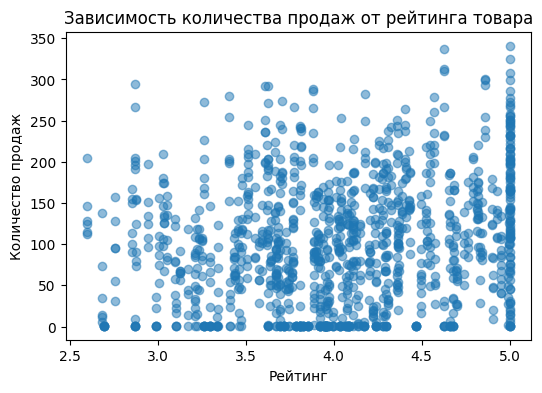

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Гипотеза 1. Рейтинг товара не влияет на его продажи

plt.figure(figsize=(6,4))
plt.scatter(df['rating'], df['units_sold'], alpha=0.5)
plt.title('Зависимость количества продаж от рейтинга товара')
plt.xlabel('Рейтинг')
plt.ylabel('Количество продаж')
plt.show()

Гипотеза опровергнута: рейтинг товара влияет на количество продаж

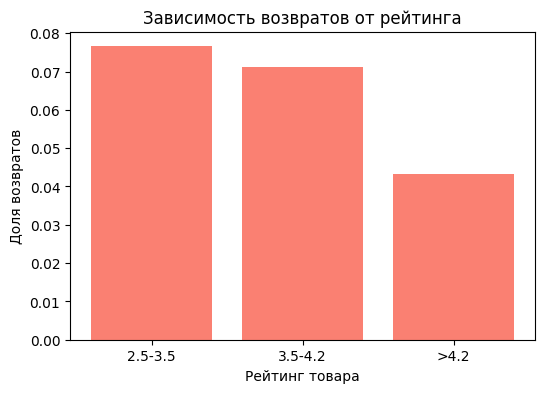

In [ ]:
#Гипотеза 2. Возвраты не зависят от рейтинга

df['rating_bin'] = pd.cut(
    df['rating'],
    bins=[0.9, 2.5, 3.5, 4.2, 5.0],
    labels=['<=2.5', '2.5-3.5', '3.5-4.2', '>4.2'],
    include_lowest=True
)

return_rate = df.groupby('rating_bin', observed=True)['is_returned'].mean()

plt.figure(figsize=(6,4))
plt.bar(return_rate.index.astype(str), return_rate.values, color='salmon')
plt.ylabel('Доля возвратов')
plt.xlabel('Рейтинг товара')
plt.title('Зависимость возвратов от рейтинга')
plt.show()

Гипотеза опровергнута: возвраты зависят от рейтинга

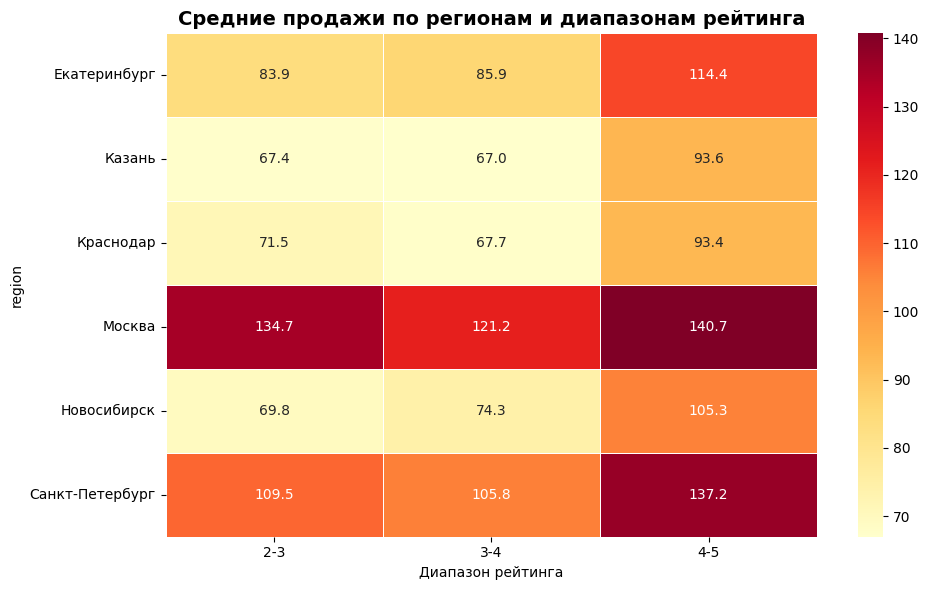

In [ ]:
#Гипотеза 3. Продажи по регионам не зависят от рейтинга товара

# Создаем диапазоны рейтинга
df['rating_bin'] = pd.cut(df['rating'], bins=[0, 2, 3, 4, 5], labels=['1-2', '2-3', '3-4', '4-5'])

heatmap_data = df.pivot_table(values='units_sold',
                            index='region',
                            columns='rating_bin',
                            aggfunc='mean',
                            observed=False)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlOrRd', linewidths=0.5)
plt.title('Средние продажи по регионам и диапазонам рейтинга', fontsize=14, fontweight='bold')
plt.xlabel('Диапазон рейтинга')
plt.tight_layout()
plt.show()


Гипотеза подтверждена: продажи по регионам не зависят от рейтинка

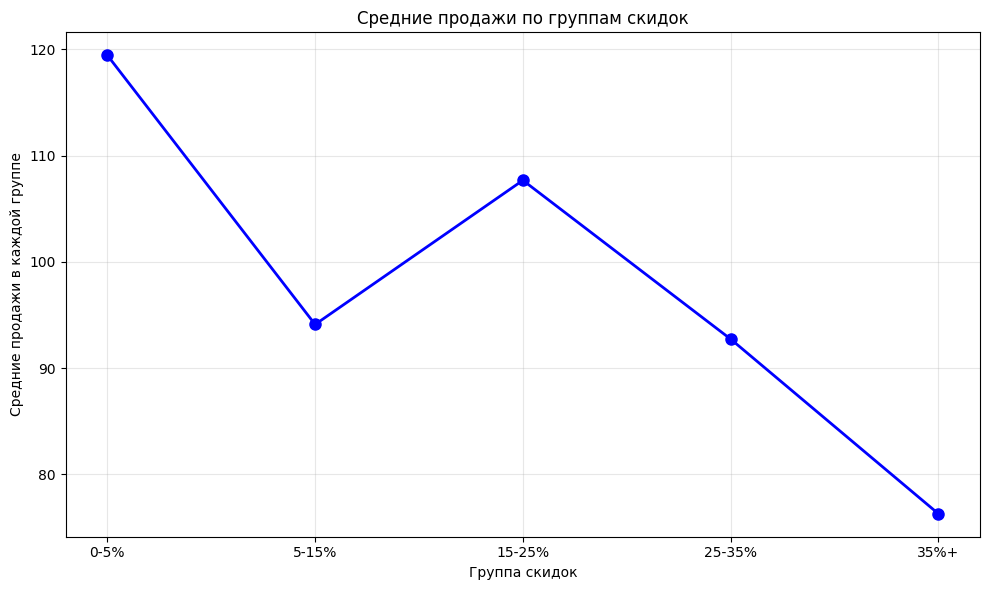

In [ ]:
#Гипотеза 4. Размер скидки не влияет на продажи

df['discount_group'] = pd.cut(df['discount'],
                            bins=[0, 0.05, 0.15, 0.25, 0.35, 1],
                            labels=['0-5%', '5-15%', '15-25%', '25-35%', '35%+'])

# Считаем средние продажи по группам
result = df.groupby('discount_group', observed=False)['units_sold'].mean()

plt.figure(figsize=(10, 6))
plt.plot(result.index, result.values, marker='o', linewidth=2, markersize=8, color='blue')
plt.title('Средние продажи по группам скидок')
plt.xlabel('Группа скидок')
plt.ylabel('Средние продажи в каждой группе')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Гипотеза подтверждена: размер скидок не влияет на продажи

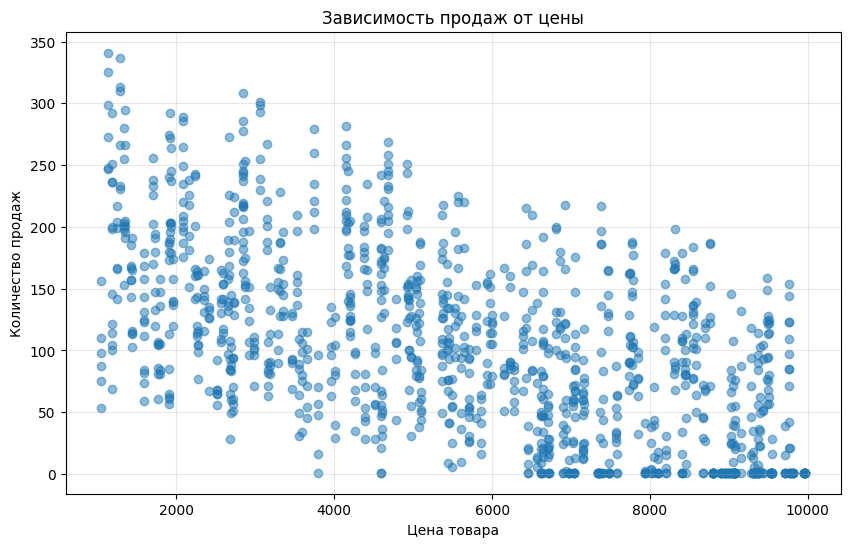

In [ ]:
#Гипотеза 5. Спрос на товары не зависит от цены

plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['units_sold'], alpha=0.5)
plt.title('Зависимость продаж от цены')
plt.xlabel('Цена товара')
plt.ylabel('Количество продаж')
plt.grid(True, alpha=0.3)
plt.show()

Гипотеза опровергнута: спрос на товары зависит от цены

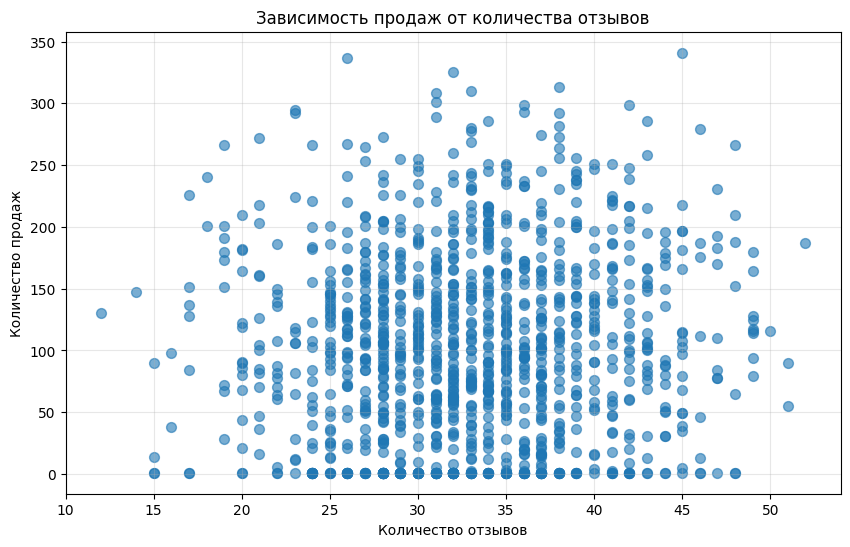

In [ ]:
#Гипотеза 6. Количество отзывов не влияет на продажи

plt.figure(figsize=(10, 6))
plt.scatter(df['reviews_count'], df['units_sold'], alpha=0.6, s=50)
plt.title('Зависимость продаж от количества отзывов')
plt.xlabel('Количество отзывов')
plt.ylabel('Количество продаж')
plt.grid(True, alpha=0.3)
plt.show()

Гипотеза подтверждена: количество отзывов не влияет на спрос

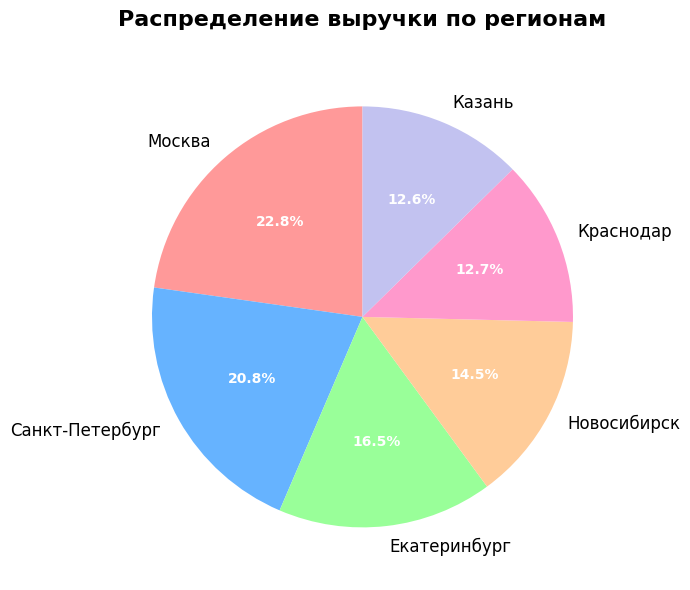

In [ ]:
#Гипотеза 7. Объём продаж не зависит от региона

# Считаем суммарную выручку по регионам
total_revenue = df.groupby('region')['revenue'].sum().sort_values(ascending=False)

# Создаем круговую диаграмму
plt.figure(figsize=(8, 6))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc', '#c2c2f0']
wedges, texts, autotexts = plt.pie(total_revenue.values,
                                  labels=total_revenue.index,
                                  colors=colors,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  textprops={'fontsize': 12})

# Увеличиваем размер процентных подписей
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

plt.title('Распределение выручки по регионам', fontsize=16, fontweight='bold', pad=20)


plt.tight_layout()
plt.show()

Гипотеза опровергнута: обьем продаж зависит от региона

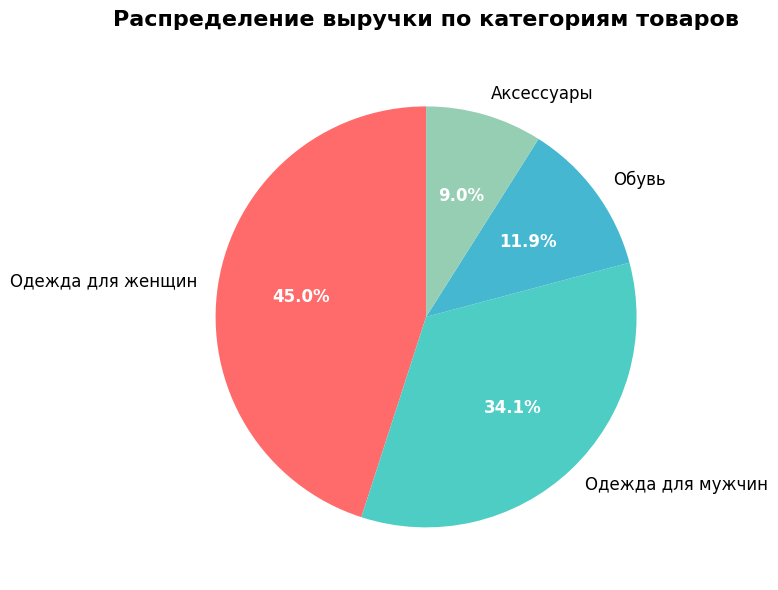

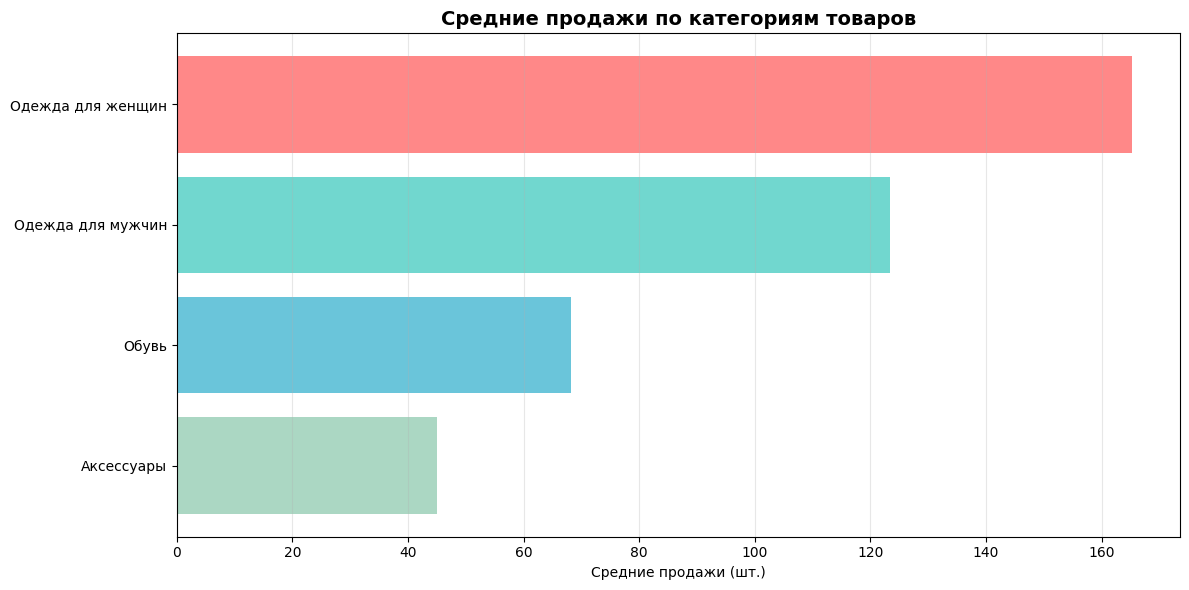

In [ ]:
#Гипотеза 8. Продажи не равномерно распределены между категориями товаров

#Круговая диаграмма выручки по категориям
category_revenue = df.groupby('category')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
wedges, texts, autotexts = plt.pie(category_revenue.values,
                                  labels=category_revenue.index,
                                  colors=colors,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  textprops={'fontsize': 12})

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.title('Распределение выручки по категориям товаров', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
category_sales = df.groupby('category')['units_sold'].mean().sort_values(ascending=True)  # Сортируем для лучшего отображения

#Горизонтальная линейчатая диаграмма
bars = plt.barh(category_sales.index, category_sales.values, color=['#96CEB4','#45B7D1', '#4ECDC4', '#FF6B6B'], alpha=0.8)

plt.title('Средние продажи по категориям товаров', fontsize=14, fontweight='bold')
plt.xlabel('Средние продажи (шт.)')

plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

Гипотеза подтверждена: продажи не равномерно распределены между категориями товаров